In [21]:
import data_loader
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_train = data_loader.load_train_data("../data/adult.data", valid_rate=1, is_df = "True")
test = data_loader.load_test_data("../data/adult.test", is_df = "True")
train = init_train[1]

### Replacing all column indices with attribute names

We printed the dataframe and we noticed that column values were numbers, so we replaced with the attribute names for better readability.

In [22]:
col_map = ["age", "workclass", "final_weight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "cap_gain", "cap_loss", "hrs_p_week","country","income"]
train.columns = col_map
test.columns = col_map

### Printing train and test data

In [38]:
train.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_p_week,country,income
24337,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
17049,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
21016,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
2790,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K
13511,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


In [39]:
test.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_p_week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


It seems that in test data, the income class has a '.' at the end. We need to remove it later

### Columns in the data

In [23]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 24337 to 10137
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final_weight      32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap_gain          32561 non-null int64
cap_loss          32561 non-null int64
hrs_p_week        32561 non-null int64
country           32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


### Converting other columns to categorical for both train and test data

In [24]:
train = pd.concat([
        train.select_dtypes(['object']).apply(pd.Series.astype, dtype = 'category'),
        train.select_dtypes([], ['object'])
        ], axis = 1).reindex(train.columns, axis = 1)

test = pd.concat([
        test.select_dtypes(['object']).apply(pd.Series.astype, dtype = 'category'),
        test.select_dtypes([],['object'])
        ], axis = 1).reindex(test.columns, axis = 1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 24337 to 10137
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
final_weight      32561 non-null int64
education         32561 non-null category
education_num     32561 non-null int64
marital_status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
cap_gain          32561 non-null int64
cap_loss          32561 non-null int64
hrs_p_week        32561 non-null int64
country           32561 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 2.0 MB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null category
final_weight      16281 non-null int64
education         16281 non-null category
education_num     16281 non-null int64
marital_status    16281 non-null category
occupation        16281 non-null category
relationship      16281 non-null category
race              16281 non-null category
sex               16281 non-null category
cap_gain          16281 non-null int64
cap_loss          16281 non-null int64
hrs_p_week        16281 non-null int64
country           16281 non-null category
income            16281 non-null category
dtypes: category(9), int64(6)
memory usage: 910.7 KB


### Summary of numerical data

#### Training data

In [27]:
train.describe()

,age,final_weight,education_num,cap_gain,cap_loss,hrs_p_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Test data

In [28]:
test.describe()

,age,final_weight,education_num,cap_gain,cap_loss,hrs_p_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## Checking if numerical columns are correlated

In [29]:
print(train.corr())

                    age  final_weight  education_num  cap_gain  cap_loss  \
age            1.000000     -0.076646       0.036527  0.077674  0.057775   
final_weight  -0.076646      1.000000      -0.043195  0.000432 -0.010252   
education_num  0.036527     -0.043195       1.000000  0.122630  0.079923   
cap_gain       0.077674      0.000432       0.122630  1.000000 -0.031615   
cap_loss       0.057775     -0.010252       0.079923 -0.031615  1.000000   
hrs_p_week     0.068756     -0.018768       0.148123  0.078409  0.054256   

               hrs_p_week  
age              0.068756  
final_weight    -0.018768  
education_num    0.148123  
cap_gain         0.078409  
cap_loss         0.054256  
hrs_p_week       1.000000  


As none of the numerical columns in the training data are correlated, we cannot drop any of them.

### Removing missing Values
We now noticed that the training dataset had missing values and we counted the no of missing values for every column. After finding out the columns that missing values, we removed those corresponding rows. It was approximately around 2000 and did not alter the dataset much.

#### No of missing rows per column in training data

In [30]:
for column in train.columns:
    su = (train[column] == ' ?').sum()
    if su > 0:
        print("Column: ",column, " Count: ",su)

Column:  workclass  Count:  1836
Column:  occupation  Count:  1843
Column:  country  Count:  583


C:\Users\Karan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### Removing the rows with missing entries

In [31]:
train = train[((train.country != ' ?') & (train.workclass != ' ?') & (train.occupation != ' ?'))]

In [32]:
print(train.occupation.value_counts())

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
 ?                       0
Name: occupation, dtype: int64


#### No of missing rows per column in test data

In [33]:
for column in test.columns:
    su = (test[column] == ' ?').sum()
    if su > 0:
        print("Column: ",column, " Count: ",su)

Column:  workclass  Count:  963
Column:  occupation  Count:  966
Column:  country  Count:  274


#### Removing the rows with missing entries

In [34]:
test = test[((test.country != ' ?') & (test.workclass != ' ?') & (test.occupation != ' ?'))]

In [43]:
print(test.occupation.value_counts())

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
 ?                       0
Name: occupation, dtype: int64


### Feature Cleaning:

We analyzed the dataset and found that the columns education and education number had a one-to-one mapping. Thus we have extracted this one-to-one mapping relationship into a dictionary called edu_map and later will remove the education column from the dataset.

In [36]:
edu = train[['education','education_num']]

edu_map = edu.drop_duplicates().set_index('education_num').to_dict()['education']

sorted_index = []
for key, val in sorted(edu_map.items()):
    sorted_index.append(val)


## Data Visualization

Now we move onto visualizing each of the categorical columns and try to find how each is(or isn't) related to the income being <=50K or >50K 

## 1. Workclass vs Income

## 2. Education vs Income

C:\Users\Karan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


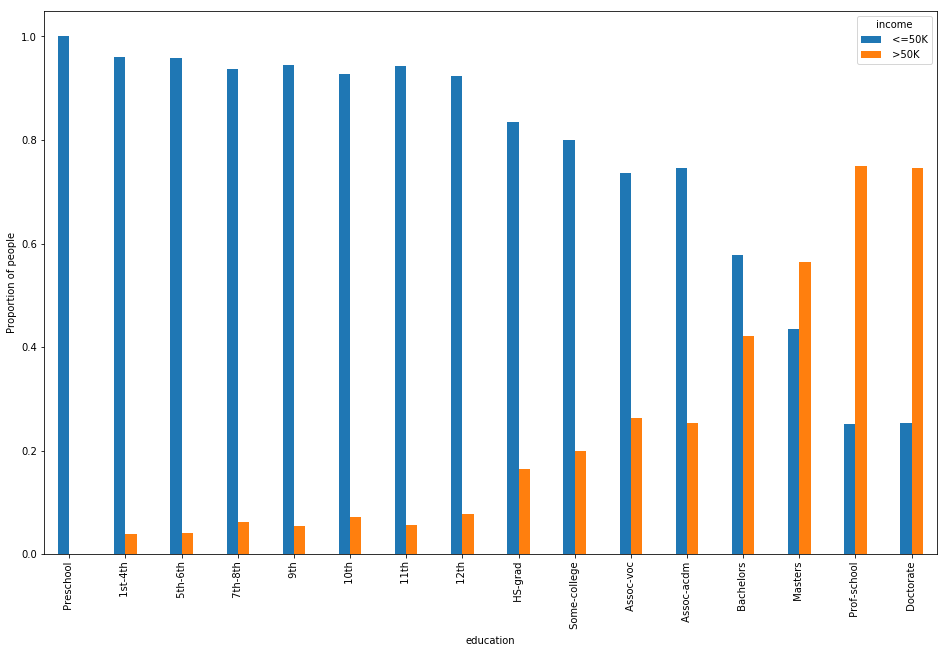

In [41]:
# Counting rows wrt education and incomes
edu_income_c = train.groupby(['education','income']).count()['age'].unstack('income').fillna(0).reindex(sorted_index)

# Calculating the proportion of people in each income class for each education level
temp = edu_income_c[" <=50K"] / (edu_income_c[" <=50K"] + edu_income_c[" >50K"])
edu_income_c[" >50K"] = edu_income_c[" >50K"] / (edu_income_c[" <=50K"] + edu_income_c[" >50K"])
edu_income_c[" <=50K"] = temp

#print(edu_income_c)
fig, axes = plt.subplots()

axes.set_xlabel('Education')
axes.set_ylabel('Proportion of people')
edu_income_c.plot.bar(ax = axes, figsize = (16,10), width = 0.4)

fig.show()

We see that, as expected, the proportion of people earning more than 50K increases as people tend to attain higher levels of education. But, not until completing a Masters degree do people earning more than 50K exceed people earning less than 50K.

### Removing the education column from the dataset

In [ ]:
train.drop(columns="education", inplace=True)

### Results Remapping

Income column is the result column. We have essentially remapped the two output values (<=50K and >50K) to binary values (0 and 1),# and put them in a new numpy array

In [ ]:
train['income'] = train['income'].map({ " <=50K": 0, " >50K": 1})
Results = np.copy(train['income'].values)
train.drop(columns="income",inplace=True)

In [ ]:
print(train.columns)

In [ ]:
print(new_train.corr())